# TP de simulation probabiliste

In [1]:
import random as rd
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy as np

On va utiliser l'outil "générateur de nombres aléatoires" pour expérimenter sur certains problèmes classiques de probabilité.

##  1. Le paradoxe du Duc De Toscane

Le Grand Duc de Toscane avait remarqué que, bien qu'il y ait autant de façons d'écrire 9 et 10 comme somme de 3 nombres compris entre 1 et 6, on obtient plus souvent un total de 10 lorsqu'on lance 3 dés. Galilée lui donna vers 1620 une explication de ce paradoxe. Galilée est alors Premier Mathématicien de l’Université de Pise et Premier Philosophe du Grand Duc à Florence). Galilée est ainsi l’un des premiers avec Cardan à avoir écrit sur le « calcul des hasards », mais leurs écrits n’ont été publiés qu’après la célèbre correspondance entre Pascal et Fermat qui marque « officiellement » le début de la théorie des probabilités. Le mémoire de Galilée qui nous intéresse n’a été édité qu’en 1718.

**Exercice** Écrire une fonction `toscane(N)` qui simule N tirages de 3 dés, qui pour chaque tirage calcule la somme des 3 dés  et affiche les pourcentages d'obtention de 9 et 10.

Par exemple, lorsque je tape `toscane(1000000)`, j'obtiens un résultat du genre :

```
9 a été obtenu dans 11.5599 % des cas
10 a été obtenu dans 12.4949 % des cas
```


In [2]:
def toscane(N):
    X = npr.randint(1,7,N) + npr.randint(1,7,N) + npr.randint(1,7,N)
    nb9 = np.count_nonzero(X == 9)
    nb10 = np.count_nonzero(X == 10)
    print(f"9 a été obtenu dans {100*nb9/N} % des cas")
    print(f"10 a été obtenu dans {100*nb10/N} % des cas")

Tester votre fonction sur 1000000 tirages :

In [3]:
toscane(1000000)

9 a été obtenu dans 11.593 % des cas
10 a été obtenu dans 12.5013 % des cas


Le résultat obtenu semble bien  corroborer l'observation du Duc de Toscane. Il reste donc à l'expliquer.

**Exercice** Ecrire une fonction `ecriture(n)` qui énumère ltoutes les façons d'écrire un nombre comme somme de trois entiers compris entre 1 et 6.

In [4]:
def ecriture(n):
    compte = 0
    for i in range(1,7):
        for j in range(i,7):
            for k in range(j,7):
                if i +j+k == n:
                    print(f"{i}+{j}+{k}={n}")
                    compte += 1
    print(f"{n} s'écrit donc de {compte} façons comme somme de trois entiers entre 1 et 6")

Testez ensuite en tapant
```python
ecriture(9)
ecriture(10)
```

In [5]:
ecriture(9)
ecriture(10)

1+2+6=9
1+3+5=9
1+4+4=9
2+2+5=9
2+3+4=9
3+3+3=9
9 s'écrit donc de 6 façons comme somme de trois entiers entre 1 et 6
1+3+6=10
1+4+5=10
2+2+6=10
2+3+5=10
2+4+4=10
3+3+4=10
10 s'écrit donc de 6 façons comme somme de trois entiers entre 1 et 6


C'est là le paradoxe : les deux nombres s'écrivent chacun du même nombre de façons, et pourtant 10 apparait plus souvent que 9. On voit ici que le Duc de Toscane avait déjà des notions de calcul des probabilités. mais son erreur est de regarder les écritures non ordonnées, alors que ce qui compte ici, ce sont les écitures ordonnées.

Il ne s'agit pas d'un vrai paradoxe, mettant en jeu la cohérence des mathématiques, juste une erreur de compréhension d'un phénomène mathématique.

Pour bien comprendre, écrivez maintenant une fonction `ecriture_ordonnee(n)` Qui prend en argument un entier `n`

In [6]:
def ecriture_ordonnee(n):
    compte = 0
    for i in range(1,7):
        for j in range(1,7):
            for k in range(1,7):
                if i + j + k == n:
                    print(f"{i}+{j}+{k}={n}")
                    compte += 1
    print(f"{n} s'écrit donc de {compte} façons comme somme ordonnée de trois entiers entre 1 et 6")

In [7]:
ecriture_ordonnee(9)
ecriture_ordonnee(10)

1+2+6=9
1+3+5=9
1+4+4=9
1+5+3=9
1+6+2=9
2+1+6=9
2+2+5=9
2+3+4=9
2+4+3=9
2+5+2=9
2+6+1=9
3+1+5=9
3+2+4=9
3+3+3=9
3+4+2=9
3+5+1=9
4+1+4=9
4+2+3=9
4+3+2=9
4+4+1=9
5+1+3=9
5+2+2=9
5+3+1=9
6+1+2=9
6+2+1=9
9 s'écrit donc de 25 façons comme somme ordonnée de trois entiers entre 1 et 6
1+3+6=10
1+4+5=10
1+5+4=10
1+6+3=10
2+2+6=10
2+3+5=10
2+4+4=10
2+5+3=10
2+6+2=10
3+1+6=10
3+2+5=10
3+3+4=10
3+4+3=10
3+5+2=10
3+6+1=10
4+1+5=10
4+2+4=10
4+3+3=10
4+4+2=10
4+5+1=10
5+1+4=10
5+2+3=10
5+3+2=10
5+4+1=10
6+1+3=10
6+2+2=10
6+3+1=10
10 s'écrit donc de 27 façons comme somme ordonnée de trois entiers entre 1 et 6


La probabilité d'obtenir 9 est donc $\frac{25}{6^3} \simeq 0,1157$, alors que celle d'obtenir 10 est 
$\frac{27}{6^3} = 0,125$. Le résultat de ce calcul est conforme aux observations faites par simulation.

## 2. Le lièvre et la tortue


Le lièvre et la tortue jouent aux dés en lançant autant de fois que nécessaire un dé. A chaque tirage, si on obtient de 1 à 5, la tortue avance d'une case, si on obtient 6, le lièvre avance de 6 cases d'un coup. Le premier qui a avancé de 6 cases a gagné.

Autrement dit, il y a au plus 6 tirages. Si parmi ceux là, il y a un 6, le lièvre gagne, sinon, c'est la tortue.

**Exercice** 

Ecrire une fonction `partie()`, ne prenant pas d'argument, qui simule une partie et rend "tortue" ou "lièvre" suivant qui a gagné.

In [8]:
def partie():
    for i in range(6):
        x = npr.randint(1,7)
        if x == 6:
            return "lièvre"
    return "tortue"

**Exercice** 

Faire simuler un grand nombre de parties et mesurer la proportion de gain du lièvre.

In [9]:
def simulation_lievre_tortue(jeu,N):
    lievre = 0
    for i in range(N):
        if jeu() == "lièvre":
            lievre +=1
    print(f"le lievre gagne dans  {100*lievre/N} % des cas")

In [10]:
simulation_lievre_tortue(partie,1000000)

le lievre gagne dans  66.578 % des cas


**Exercice**

Vous aurez sans doute observé que le lièvre a une probabilité de gagner supérieure à celle de la tortue. Pour rééquilibrer les choses, on introduit une nouvelle règle en décidant maintenant que la tortue avance de deux cases quand c'est à elle d'avancer.

Modélisez cette nouvelle règle, et observez par simulation quelles sont les probabilités de gain de chacun.

In [11]:
def partie_2():
    x = npr.randint(1,7,3)
    if 6 in x:
        return "lièvre"
    return "tortue" 

In [12]:
simulation_lievre_tortue(partie_2,1000000)

le lievre gagne dans  42.0877 % des cas


## 3. Simulation de la loi binomiale


On réalise $n$ fois une expérience de Bernoulli de paramètre p. Pour $k=0,\ldots,n$, on s'intéresse à la probabilité $B_{n;p}(k)$ d'obtenir exactement $k$ fois un 1. 

Un calcul combinatoire simple montre que :
$$
B_{n,p}(k) = {n\choose k}  p^k(1-p)^{n-k} \qquad k=0,\ldots,n
$$
C'est la loi binômiale de parmètres $n$ et $p$

**Exercice**

Écrire une fonction `tirage_binomial(n,p)`, prenant en arguments un entier $n$ et un réel $p$ compris entre 0 et 1, qui fait $n$ tirages d'une épreuve de Bernoulli de paramètre $p$, et rend le nombre $k$ d'apparitions du 1.

In [13]:
def tirage_binomial(n,p):
    x = np.floor(p+npr.rand(n))
    return int(sum(x))

In [14]:
tirage_binomial(25,0.3)

13

**Exercice**

Écrire une fonction  `simulation_binomiale(n,p,N)` qui appelle $N$ fois la fonction `tirage_binomial(n,p)`, calcule la fréquence d'apparitions des entiers $k$ pour $0\leq k \leq n$, et affiche ces fréquences sous forme d'un diagramme en barres (fonction `bar` de `matplotlib`).

In [15]:
def simulation_binomiale(n,p,N):
    compteur = [0]*(n+1)
    for i in range(N):
        k = tirage_binomial(n,p)
        compteur[k] += 1
    compteur = [x/N for x in compteur]
    plt.bar(range(n+1),compteur)

Testez votre fonction `simulation_binomiale(n,p,N)` pour différentes valeurs des arguments.

Quelle semble être l'espérance d'une variable aléatoire qui suit la loi binomiale $B_{n,p}$ ?

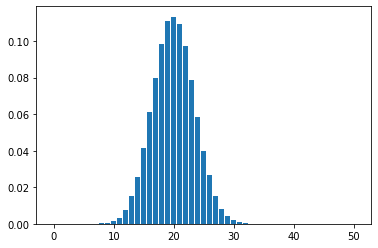

In [16]:
simulation_binomiale(50,0.4,100000)

On observe une sorte de courbe en cloche, centrée autour de $pn$.

On va maintenant comparer nos observations obtenues par simulation aux calculs exacts, obtenue grâce à l'expression explicite de la loi binomiale, rappelée plus haut.

**Exercice**

Écrire une fonction `pascal(n)` qui rend la $n$-ème ligne du triangle de Pascal.

Ainsi `pascal(3)` rendra `[1,3,3,1]`.

In [17]:
def pascal(n):
    x = [1] + n*[0]
    for i in range(n):
        y = [1]
        for j in range(n):
            y.append(x[j] + x[j+1])
        x = y
    return x

pascal(3)

[1, 3, 3, 1]

**Exercice**

Écrire une fonction `binomiale(n,p)` prenant en argument un entier $n$ et une probabilité $p$ et calculant le vecteur des $B_{n,p}(k)$.

In [18]:
def binomiale(n,p):
    x = pascal(n)
    x = [ p**k * (1-p)**(n-k) * x[k] for k in range(n+1) ]
    return x

binomiale(8,0.3)

[0.05764800999999997,
 0.1976503199999999,
 0.2964754799999999,
 0.2541218399999999,
 0.13613669999999997,
 0.04667543999999998,
 0.010001879999999998,
 0.0012247199999999997,
 6.560999999999998e-05]

**Exercice**

Faire représenter la loi binomiale  par un diagramme en barres, et comparer avec ce qu'on a obtenu par simulation.

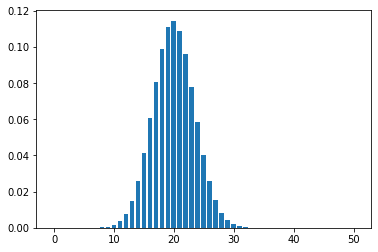

In [19]:
def plot_binomiale(n,p):
    plt.bar(range(n+1) , binomiale(n,p))
    
plot_binomiale(50,0.4)

## 4. Tirage sans remise

On a un panier de 10 oeuf, parmi lesquels 5 sont pourris. On prend au hasard 3 oeufs dans ce panier. Bien sûr, quand on prend un oeuf, on ne le remet pas dans le panier ensuite !

Pour tout $k\in[0,3]$, on note $P(k)$ la probabilité qu'il y ait $k$ oeufs pourris parmi les 3 qui ont été choisis. 

**Exercice**

* Ecrire une fonction `tirage_sans_remise()` qui simule un tirage sans remise de 3 oeufs dans notre panier, et rend le nombre d(oeufs pourris qu'on a obtenu.
* Ecrire une fonction `frequences_tirage_sans_remise(N)` qui réalise $N$ expériences de tirage de 3 oeufs dans le panier, et rend les fréquences d'apparition `[F(0), F(1), F(2), F(3)]`du nombre d'oeufs pourris.
* Comparer avec ce que donnerait un titage avec remise.

In [20]:
def tirage_sans_remise():
    l = np.arange(10)
    npr.shuffle(l)
    pris = l[:3]
    return np.count_nonzero(pris < 5)

def frequences_tirage_sans_remise(N):
    resultats = [0,0,0,0]
    for i in range(N):
        nb = tirage_sans_remise()
        resultats[nb] += 1
    print([x/N for x in resultats])

In [21]:
frequences_tirage_sans_remise(100000)

[0.08423, 0.41632, 0.41478, 0.08467]


On compare ça à la loi binomiale de paramètres 3 et 0.5, qui correspond à un tirage avec remise :

In [22]:
binomiale(3,0.5)

[0.125, 0.375, 0.375, 0.125]

## 5. Temps de première apparition d'un motif

On lance indéfiniment une pièce de monnaie équilibrée et on note les résultats. On obtient ainsi une suite de `pile` et de `face`, ou si on préfère de `0` et de `1`.  On se donne un motif constitué de 0 et de 1, par exemple `M = 0010111`. Ce motif apparaitra un jour dans la suite de `0` et de `1` produite par la pièce de monnaie. On appelle temps d'apparition du motif `M` le numéro du lancer qui fait apparaitre pour la première fois `M` dans la liste.

Par exemple, si la suite observée donne :
`000110100101110100...`
on voit que le motif`M` est apparu lorsqu'on a fait le 14-ème tirage. Le temps d'attente lors de cette expérience a donc été `T = 14`.

**Exercice**

Ecrire une fonction `temps_apparition(motif)` prenant en argument une chaîne de caractères composée de 0 et de 1, qui simule une suite de lancers de pile ou face, et rendant le nombre de lancers qui ont été nécessaires pour voir apparaitre le motif.

In [23]:
def temps_apparition(motif):
    l = len(motif)
    suite = ""
    T = 0
    while suite[-l:] != motif:
        tirage = rd.randint(0,1)
        suite += str(tirage)
        T += 1
    return T

**Exercice**

Ecrire une fonction `moyenne_temps_apparition(motif,N)` qui simule $N$ suites de lancers, et rend la moyenne des temps d'apparition du motif dans chacune de ces suites.

In [24]:
def moyenne_temps_apparition(motif,N):
    s = 0
    for i in range(N):
        s += temps_apparition(motif)
    return s/N

**Exercice** 

Pour chacune des 8 motifs composés de 3 caractères valant 0 ou 1, évaluer par simulation l'espérance du temps d'apparition de ce motif dans une suite infinie de lancers.

In [25]:
N = 100000
for motif in ['000','001','010','011','100','101','110','111']:
    T = moyenne_temps_apparition(motif,N)
    print(f"le temps moyen d'apparition de {motif} est {T}")

le temps moyen d'apparition de 000 est 13.9262
le temps moyen d'apparition de 001 est 8.00189
le temps moyen d'apparition de 010 est 9.9588
le temps moyen d'apparition de 011 est 8.00941
le temps moyen d'apparition de 100 est 8.00435
le temps moyen d'apparition de 101 est 9.97128
le temps moyen d'apparition de 110 est 7.99204
le temps moyen d'apparition de 111 est 14.00389


## 6. Lutte entre deux motifs de même taille : lequel apparait le premier ?

Deux joueurs jouent l'un contre l'autre ; ils choisissent chacun un motif, tous les deux de même taille. Ensuite, ils font une série de lancers de pile ou face, et s'arrêtent seulement quand l'un des deux motifs est sorti. le joueur dont le motif apparait en premier a gagné.

On veut savoir quel motif doit choisir un joueur pour maximiser sa probabilité de gagner.

**Exercice**

Ecrire une fonction `partie(motif1,motif2)` qui simule une partie entre les deux motifs et rend  le numéro du gagnant.

In [26]:
def partie(motif1,motif2):
    l = len(motif1)
    suite = ""
    while suite[-l:] not in [motif1, motif2]:
        tirage = rd.randint(0,1)
        suite += str(tirage)
    if suite[-l:] == motif1:
        return 1
    else:
        return 2

**Exercice**

Ecrire une fonction `comparaison(motif1,motif2,N)` qui simule $N$ parties entre les deux motifs et affiche la proportion de gain du motif 1 sur le motif 2.

In [27]:
def comparaison(motif1,motif2,N):
    n1 = 0
    for i in range(N):
        n1 += (2 - partie(motif1,motif2))
    print(n1/N,1-n1/N)

On regarde les deux motifs `100` et `001`.
* Lequel des deux gagne en moyenne contre l'autre l'autre ?
* faites calculer les temps moyens d'apparition de ces deux motifs.
Que déduisez-vous de ces observations ?

In [28]:
N = 100000

comparaison('100','001',N)
print("100 ->", moyenne_temps_apparition('100',N))
print("001 ->", moyenne_temps_apparition('001',N))


0.75153 0.24846999999999997
100 -> 7.99625
001 -> 8.0079


Les deux motifs ont le même temps moyen d'apparition, mais `100` gagne nettement devant `001`

*La relation "gagner contre" est-elle transitive ?*

Effectuez les comparaisons suivantes :
* `110` contre `100`
* `100` contre `001`
* `001` contre `011`
* `001` contre `110`

In [29]:
N = 100000

comparaison('110','100',N)
comparaison('100','001',N)
comparaison('001','011',N)
comparaison('011','110',N)

0.66697 0.33303000000000005
0.75021 0.24978999999999996
0.66531 0.33469000000000004
0.75036 0.24963999999999997


On remarque que `110` gagne en moyenne contre `100`, qui gagne en moyenne contre `001`,  qui gagne en moyenne contre  `011`,  qui gagne en moyenne contre  `110`.

La relation "gagner en moyenne contre" n'est pas transitive !